# Importation des librairies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier


# Définition des classes selon la documentation du code 
La classe est définie à la dernière colonne de chaque rangée.

In [6]:
classes = {
    0: 'Fonctionnement normal',
    1: 'Battements ventriculaires prématurés',
    2: 'Contractions ventriculaires prématurés',
    3: 'Fusion ventriculaire et battement normal',
    4: 'Inconnu',
}

# Création des dataframes avec pandas à partir des données

In [7]:
data_train = pd.read_csv('data/mitbih_train.csv', header=None)
data_test = pd.read_csv('data/mitbih_test.csv', header=None)

# Extraction des données d'entrainement
x_train = data_train.iloc[:, :-1]
# Extraction des résultats d'entrainement
y_train = data_train.iloc[:, -1]
# Extraction des données de test
x_test = data_test.iloc[:, :-1]
# Extraction des résultats de test
y_test = data_test.iloc[:, -1]

# Création de l'arbre

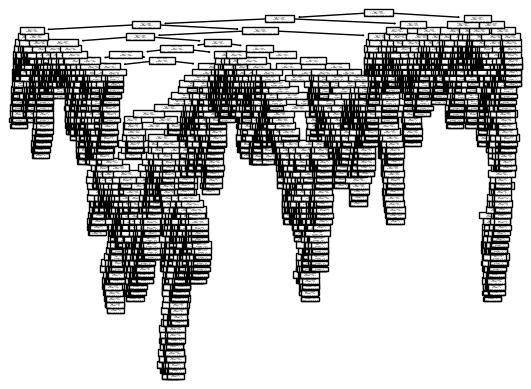

In [15]:
data_tree = tree.DecisionTreeClassifier()
data_tree.fit(x_train, y_train)

tree.plot_tree(data_tree)

# Save the plot as a PNG file
plt.savefig('plot.png')


# Évaluation des performances du modèle

In [10]:
y_pred = data_tree.predict(x_test)

exactitude = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
rappel = metrics.recall_score(y_test, y_pred, average='weighted')
score_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Exactitude :", exactitude)
print("Précision :", precision)
print("Rappel :", rappel)
print("Score F1 :", score_f1)


Exactitude : 0.9532249223460625
Précision : 0.9535445789400895
Rappel : 0.9532249223460625
Score F1 : 0.9533765063515054


# Création de la forêt aléatoire

In [11]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)


RandomForestClassifier()

# Évaluation des performances du modèle

In [12]:
y_pred_forest = forest.predict(x_test)

exactitude_forest = metrics.accuracy_score(y_test, y_pred_forest)
precision_forest = metrics.precision_score(y_test, y_pred_forest, average='weighted')
rappel_forest = metrics.recall_score(y_test, y_pred_forest, average='weighted')
score_f1_forest = metrics.f1_score(y_test, y_pred_forest, average='weighted')

print("Exactitude de la forêt aléatoire :", exactitude_forest)
print("Précision de la forêt aléatoire :", precision_forest)
print("Rappel de la forêt aléatoire :", rappel_forest)
print("Score F1 de la forêt aléatoire :", score_f1_forest)


Exactitude de la forêt aléatoire : 0.9743285218344601
Précision de la forêt aléatoire : 0.974311445273119
Rappel de la forêt aléatoire : 0.9743285218344601
Score F1 de la forêt aléatoire : 0.9726135848192355
